In [1]:
%%bash
AWS_STS_RESPONSE=`aws sts assume-role-with-web-identity \
        --role-arn arn:aws:iam::376067480372:role/eks-pangeo-node \
        --role-session-name gdal-session-$(date +%s) \
        --web-identity-token file:///var/run/secrets/eks.amazonaws.com/serviceaccount/token`

echo ${AWS_STS_RESPONSE} | python3 -m json.tool> my_cred.json

In [2]:
import json
import os
file_j = 'my_cred.json'
with open(file_j) as json_file: 
    data = json.load(json_file) 
    
key = data['Credentials']['AccessKeyId']
secret = data['Credentials']['SecretAccessKey']
session_token = data['Credentials']['SessionToken']

os.environ['AWS_ACCESS_KEY_ID'] = key
os.environ['AWS_SECRET_ACCESS_KEY'] = secret
os.environ['AWS_SESSION_TOKEN'] = session_token
os.environ['AWS_DEFAULT_REGION'] = 'us-west-2'
os.environ['AWS_REQUEST_PAYER'] = 'requester'

In [3]:
! gdalinfo /vsis3/dev-et-data/tony/gl_cog.tif | egrep 'COMPRESSION|Block'

  COMPRESSION=DEFLATE
Band 1 Block=256x256 Type=Float32, ColorInterp=Gray


In [4]:
!  gdalinfo /vsis3/dev-et-data/tony/gl_stripped.tif | egrep 'COMPRESSION|Block'

Band 1 Block=4757x1 Type=Float32, ColorInterp=Gray


In [5]:
import matplotlib.pyplot as pyplot
from rasterio.plot import show

def my_plot(array):
    cmaps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r']
    axs=()
    fig, axs = pyplot.subplots(1,8, figsize=(21,21))
    for i in range(0,8):
        show(array, ax=axs[i], cmap=cmaps[i], title=cmaps[i])
    pyplot.show()

In [6]:
import rasterio as rio

(4805, 4757)


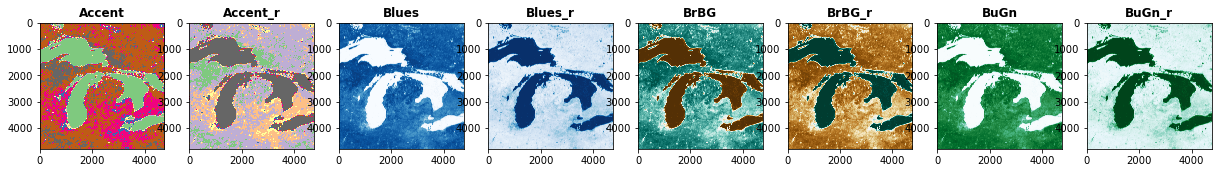

CPU times: user 3.71 s, sys: 1.14 s, total: 4.84 s
Wall time: 6.46 s


In [7]:
%%time

tif = '/vsis3/dev-et-data/tony/gl_stripped.tif'

with rio.open(tif) as src:
    array = src.read(1)  
    print(array.shape)
    my_plot(array)

(4805, 4757)


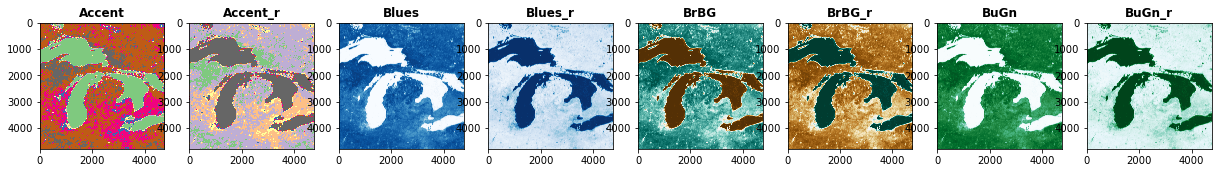

CPU times: user 4.23 s, sys: 870 ms, total: 5.1 s
Wall time: 6.33 s


In [8]:
%%time

tif = '/vsis3/dev-et-data/tony/gl_cog.tif'

with rio.open(tif) as src:
    array = src.read(1)  
    print(array.shape)
    my_plot(array)

In [9]:
%%time

tif = '/vsis3/dev-et-data/tony/gl_stripped.tif'

with rio.open(tif) as src:
    array = src.read(1)  
    print(array.shape)
    # my_plot(array)

(4805, 4757)
CPU times: user 307 ms, sys: 213 ms, total: 520 ms
Wall time: 1.35 s


In [10]:
%%time

tif = '/vsis3/dev-et-data/tony/gl_cog.tif'

with rio.open(tif) as src:
    array = src.read(1)  
    print(array.shape)
    #my_plot(array)

(4805, 4757)
CPU times: user 740 ms, sys: 108 ms, total: 848 ms
Wall time: 1.51 s


In [11]:
# Show the geometry of scene vs AOI against a basemap
import folium
import geopandas as gpd

geoms = gpd.read_file('great_lakes_edit.geojson')
m = folium.Map([50, -90], zoom_start=7, width=900, height=350, tiles='OpenStreetMap')
folium.GeoJson(geoms).add_to(m)
m

# Its REALLY REALLY easy to make COGs

# Its one line

In [12]:
%%time
! rio cogeo create /vsis3/dev-et-data/tony/gl_stripped.tif odc_steering_council_real_time_cog.tif




Traceback (most recent call last):
  File "/srv/conda/envs/pangeo/lib/python3.7/site-packages/click_plugins/core.py", line 37, in decorator
    group.add_command(entry_point.load())
  File "/srv/conda/envs/pangeo/lib/python3.7/site-packages/pkg_resources/__init__.py", line 2449, in load
    self.require(*args, **kwargs)
  File "/srv/conda/envs/pangeo/lib/python3.7/site-packages/pkg_resources/__init__.py", line 2472, in require
    items = working_set.resolve(reqs, env, installer, extras=self.extras)
  File "/srv/conda/envs/pangeo/lib/python3.7/site-packages/pkg_resources/__init__.py", line 792, in resolve
    raise VersionConflict(dist, req).with_context(dependent_req)
pkg_resources.ContextualVersionConflict: (botocore 1.14.15 (/home/jovyan/.local/lib/python3.7/site-packages), Requirement.parse('botocore<1.16.0,>=1.15.48'), {'boto3'})

CPU times: user 17.7 ms, sys: 7.47 ms, total: 25.1 ms
Wall time: 1.37 s


In [13]:
!gdalinfo odc_steering_council_real_time_cog.tif | egrep 'COMPRESSION|Block|Over'

ERROR 4: odc_steering_council_real_time_cog.tif: No such file or directory
gdalinfo failed - unable to open 'odc_steering_council_real_time_cog.tif'.


# In Summary

## Its one line to create a cog

## Its maybe two lines of code to read any geotiff including cogs

## COGs save you money and time in the cloud!

# COGs save you money and time in the cloud!

In [14]:
%%time

tif = '/vsis3/dev-et-data/tony/gl_stripped.tif'
for i in range(10):
    with rio.open(tif) as src:
        array = src.read(1)  
        print(array.shape)


(4805, 4757)
(4805, 4757)
(4805, 4757)
(4805, 4757)
(4805, 4757)
(4805, 4757)
(4805, 4757)
(4805, 4757)
(4805, 4757)
(4805, 4757)
CPU times: user 3.04 s, sys: 2.2 s, total: 5.24 s
Wall time: 11.5 s


In [15]:
%%time

tif = 'odc_steering_council_real_time_cog.tif'
for i in range(10):
    with rio.open(tif) as src:
        array = src.read(1)  
        print(array.shape)

RasterioIOError: odc_steering_council_real_time_cog.tif: No such file or directory